In [0]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import os
import datetime

import matplotlib.pyplot as plt
from skimage import color, exposure

%reload_ext tensorboard

from sklearn.metrics import accuracy_score

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [7]:
model = Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
        Flatten(),

        Dense(num_classes, activation='softmax'),       
])
#model.summary()
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

model.fit(X_train,y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 10.0205 - accuracy: 0.7904


In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
        Flatten(),

        Dense(num_classes, activation='softmax'),       
        ])
def train_model(model, X_train, y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

  logdir =os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size = params_fit.get('batch_size',128),
      epochs = params_fit.get('epochs',5),
      varbose = params_fit.get('verbose',1),
      validation_data = params_fit.get('validation_data', (X_train,y_train)),
      callbacks = [tensorboard_callback]
      
      )
  return model

In [10]:
model = get_cnn_v1(input_shape,num_classes)
model_trained = train_model(model, X_train, y_train) 

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 25.6985 - accuracy: 0.7519 - val_loss: 0.2205 - val_accuracy: 0.9479
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2132 - accuracy: 0.9511 - val_loss: 0.1826 - val_accuracy: 0.9548
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1461 - accuracy: 0.9661 - val_loss: 0.1324 - val_accuracy: 0.9658
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1066 - accuracy: 0.9760 - val_loss: 0.1473 - val_accuracy: 0.9707
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1141 - accuracy: 0.9738 - val_loss: 0.0719 - val_accuracy: 0.9810


In [11]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[5.1832711e-09, 1.7693285e-06, 7.3360256e-03, ..., 4.0644067e-03,
        8.6756342e-04, 1.7756879e-06],
       [3.2270602e-09, 7.5753590e-08, 3.5264899e-03, ..., 2.6673484e-05,
        3.4000954e-07, 2.5827896e-08],
       [1.0835787e-08, 1.7608001e-05, 3.7705575e-03, ..., 6.3531786e-02,
        1.6846709e-02, 6.0595885e-06],
       ...,
       [9.0784440e-03, 6.9343401e-03, 1.1290565e-02, ..., 2.4130777e-02,
        3.4195855e-02, 1.0752651e-02],
       [2.4625408e-03, 3.5346753e-03, 9.9761449e-03, ..., 1.7878577e-02,
        2.8062440e-02, 9.0357987e-04],
       [3.0731253e-04, 8.5929129e-03, 6.7931106e-03, ..., 1.8537473e-02,
        7.8123906e-03, 6.2263972e-04]], dtype=float32)

In [12]:
y_pred_prob[400]

array([1.43929457e-04, 9.99595106e-01, 6.91485480e-10, 1.09556694e-07,
       2.60858302e-04, 1.12804150e-11, 1.03491463e-25, 5.07483666e-21,
       2.64622050e-15, 1.80273046e-13, 2.16196125e-20, 8.95578730e-19,
       5.40479748e-20, 5.11980090e-18, 3.34866932e-17, 5.72286532e-12,
       1.01373823e-11, 1.99720795e-35, 4.67450848e-17, 4.63591444e-27,
       1.40119032e-29, 9.43764652e-26, 1.14149510e-30, 7.49425244e-23,
       4.31377731e-23, 4.70761541e-24, 9.65747593e-18, 3.01207409e-32,
       1.04939186e-20, 3.77997770e-24, 3.06759059e-27, 2.65002221e-20,
       1.05488741e-18, 1.16139298e-21, 5.58092392e-33, 1.16703199e-23,
       1.39466882e-21, 0.00000000e+00, 2.42162518e-26, 0.00000000e+00,
       5.39369015e-22, 2.83228875e-27, 7.74013292e-33], dtype=float32)

In [13]:
np.argmax(y_pred_prob[400])

1

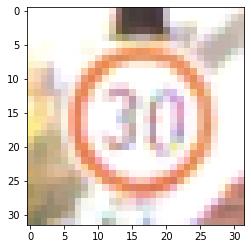

In [14]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [16]:
labels_dict[np.argmax(y_pred_prob[400])]


'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred =np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm,y_pred)


In [24]:
predict(model_trained, X_test, y_test)

0.8258503401360544

In [0]:
def train_and_predict(model):
  #model = get_cnn_v1(input_shape,num_classes)
  model_trained = train_model(model, X_train, y_train) 
  return predict(model_trained, X_test, y_test)

In [27]:
def get_cnn_v2(input_shape,num_classes):
  return Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu',),
        MaxPool2D(),
        Dropout(0.3),

        Flatten(),

        Dense(1024, activation='relu'),       
        Dropout(0.3),

        Dense(num_classes, activation='softmax'),       
        ])



train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 4.7279 - accuracy: 0.2261 - val_loss: 1.4749 - val_accuracy: 0.5825
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 1.3249 - accuracy: 0.6133 - val_loss: 0.5467 - val_accuracy: 0.8692
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.6622 - accuracy: 0.8043 - val_loss: 0.1931 - val_accuracy: 0.9551
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.4179 - accuracy: 0.8770 - val_loss: 0.1193 - val_accuracy: 0.9746
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3104 - accuracy: 0.9087 - val_loss: 0.0748 - val_accuracy: 0.9838


0.9256235827664399

In [28]:
def get_cnn_v3(input_shape,num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

        MaxPool2D(),
        Dropout(0.3),

        Flatten(),

        Dense(1024, activation='relu'),       
        Dropout(0.3),

        Dense(num_classes, activation='softmax'),       
        ])



train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 1.9349 - accuracy: 0.5729 - val_loss: 0.2359 - val_accuracy: 0.9557
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.3688 - accuracy: 0.8953 - val_loss: 0.0688 - val_accuracy: 0.9861
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2127 - accuracy: 0.9393 - val_loss: 0.0409 - val_accuracy: 0.9917
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1520 - accuracy: 0.9574 - val_loss: 0.0286 - val_accuracy: 0.9929
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1206 - accuracy: 0.9650 - val_loss: 0.0205 - val_accuracy: 0.9949


0.9684807256235828

In [29]:
def get_cnn_v4(input_shape,num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),


        Flatten(),

        Dense(1024, activation='relu'),       
        Dropout(0.3),

        Dense(num_classes, activation='softmax'),       
        ])



train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 22ms/step - loss: 2.6969 - accuracy: 0.2782 - val_loss: 1.2281 - val_accuracy: 0.6293
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 0.9936 - accuracy: 0.6865 - val_loss: 0.2648 - val_accuracy: 0.9228
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.4608 - accuracy: 0.8573 - val_loss: 0.1117 - val_accuracy: 0.9663
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2733 - accuracy: 0.9146 - val_loss: 0.0603 - val_accuracy: 0.9835
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2165 - accuracy: 0.9343 - val_loss: 0.0476 - val_accuracy: 0.9883


0.9541950113378684

In [30]:
def get_cnn_v5(input_shape,num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),


        Flatten(),

        Dense(1024, activation='relu'),       
        Dropout(0.3),

        Dense(1024, activation='relu'),       
        Dropout(0.3),

        Dense(num_classes, activation='softmax'),       
        ])



train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.5423 - accuracy: 0.3069 - val_loss: 1.0431 - val_accuracy: 0.6675
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.9508 - accuracy: 0.6952 - val_loss: 0.3326 - val_accuracy: 0.8903
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.5177 - accuracy: 0.8356 - val_loss: 0.1621 - val_accuracy: 0.9471
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3498 - accuracy: 0.8928 - val_loss: 0.0922 - val_accuracy: 0.9726
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2631 - accuracy: 0.9208 - val_loss: 0.0603 - val_accuracy: 0.9841


0.9473922902494331

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [36]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained  = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.5057 - accuracy: 0.2919 - val_loss: 0.7116 - val_accuracy: 0.7702
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5013 - accuracy: 0.8343 - val_loss: 0.1461 - val_accuracy: 0.9524
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2378 - accuracy: 0.9240 - val_loss: 0.0554 - val_accuracy: 0.9845
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1612 - accuracy: 0.9487 - val_loss: 0.0356 - val_accuracy: 0.9891
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1171 - accuracy: 0.9638 - val_loss: 0.0256 - val_accuracy: 0.9917


0.9734693877551021

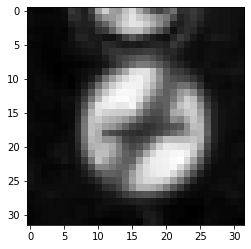

In [38]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
!git status